In [8]:
from jbfg.pandas_utils import *
# schema = 'l2_kjbk_extnl'
# sql = 'select * from loan_customer'
# loan_customer = get_df(sql,schema)
loan_customer = pd.read_csv("../0.data/loan_customer.csv")
data = loan_customer

In [9]:
#기본 사용하는 패키지 선언
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
"""
drop--sk_id_curr	대출 식별번호   

name_contract_type	Cash loans: 일반 대출, Revolving loans: 마이너스 대출
code_gender	성별
flag_own_realty	자가부동산 보유 여부
cnt_children	자녀 수
amt_income_total	소득 금액(USD)
amt_credit	신용대출 금액(USD)
name_income_type	소득 유형
name_education_type	학력
name_family_status	결혼 상태
name_housing_type	주거 형태

drop--region_population_relative	거주 지역의 표준화된 인구

days_birth	대출 신청 시점에서의 일단위 나이(기준 시점 대비 상대적인 시간)
days_employed	대출 신청 시점에서의 고객의 근무일수(기준 시점 대비 상대적인 시간)
days_registration	대출 신청 이전에 고객이 등록정보를 변경한 시점 사이의 일수(기준 시점 대비 상대적인 시간)
days_id_publish	대출 신청 이전에 고객이 신분증을 변경한 시점 사이의 일수(기준 시점 대비 상대적인 시간)

drop--flag_mobil	휴대폰 번호 등록 여부  --> 휴대전화가 다있음!

flag_emp_phone	고용주 연락처 등록 여부
flag_work_phone	직장 전화번호 등록 여부
flag_phone	집 전화번호 등록 여부
flag_email	이메일 주소 등록 여부
region_rating_client	거주지 등급

drop--weekday_appr_process_start	대출 신청 요일

drop--hour_appr_process_start	대출 신청 시간대

reg_city_not_live_city	고객의 등록지 주소와 실거주지 일치 여부
reg_city_not_work_city	고객의 등록지 주소와 직장 주소 일치 여부
live_city_not_work_city	고객의 실거주지와 직장 주소 일치 여부
organization_type	근무 회사 유형
flag_document_2	문서 2 제공 여부
flag_document_3	문서 3 제공 여부
flag_document_4	문서 4 제공 여부
cb_score_1	신용점수 1
cb_score_2	신용점수 2
cb_score_3	신용점수 3
target	타겟 변수 (1 - 대출 신청자 중 지정한 일수 동안 한번 이상 대출 분할 지불이 지연된 경우, 0 - 그 외의 경우)
"""
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SK_ID_CURR                  24000 non-null  int64  
 1   NAME_CONTRACT_TYPE          24000 non-null  object 
 2   CODE_GENDER                 16906 non-null  object 
 3   FLAG_OWN_REALTY             14429 non-null  object 
 4   CNT_CHILDREN                24000 non-null  int64  
 5   AMT_INCOME_TOTAL            24000 non-null  float64
 6   AMT_CREDIT                  16700 non-null  float64
 7   NAME_INCOME_TYPE            24000 non-null  object 
 8   NAME_EDUCATION_TYPE         24000 non-null  object 
 9   NAME_FAMILY_STATUS          24000 non-null  object 
 10  NAME_HOUSING_TYPE           24000 non-null  object 
 11  REGION_POPULATION_RELATIVE  16851 non-null  float64
 12  DAYS_BIRTH                  19251 non-null  float64
 13  DAYS_EMPLOYED               168

In [11]:
data.columns = data.columns.str.lower()

In [12]:
data = data.replace('',np.NaN)

In [13]:
#부도 데이터 비율확인(불균형데이터)
len(data[data['target']=='1'])/len(data)

0.0

In [14]:
#데이터값들을 대략적으로 확인
for col in data.columns :
     print('col :{} \n uniqu_count:\n{}\n'.format(col, data[col].value_counts()))

col :sk_id_curr 
 uniqu_count:
133119    1
351523    1
447055    1
109136    1
172625    1
         ..
105769    1
265515    1
294973    1
372320    1
190031    1
Name: sk_id_curr, Length: 24000, dtype: int64

col :name_contract_type 
 uniqu_count:
Cash loans         21733
Revolving loans     2267
Name: name_contract_type, dtype: int64

col :code_gender 
 uniqu_count:
F      11211
M       5694
XNA        1
Name: code_gender, dtype: int64

col :flag_own_realty 
 uniqu_count:
Y    9939
N    4490
Name: flag_own_realty, dtype: int64

col :cnt_children 
 uniqu_count:
0    16859
1     4703
2     2046
3      341
4       41
5        9
7        1
Name: cnt_children, dtype: int64

col :amt_income_total 
 uniqu_count:
135000.0    2779
112500.0    2422
157500.0    2052
180000.0    1860
90000.0     1785
            ... 
184950.0       1
121162.5       1
160425.0       1
40050.0        1
69646.5        1
Name: amt_income_total, Length: 494, dtype: int64

col :amt_credit 
 uniqu_count:
450000.0     5

In [15]:
#판단에 필요없는 유니크한 값을 제거함
data.drop(columns=['sk_id_curr','flag_mobil'],inplace=True)
##drop관련없을것 같은 값
#data.drop(columns=['sk_id_curr','flag_mobil','region_population_relative','weekday_appr_process_start','hour_appr_process_start','flag_own_realty'],inplace=True)

In [16]:
## 알맞은 데이터 타입으로 변환
data = data.astype({'cnt_children':'int64'})
data = data.astype({'amt_income_total':'float64'})
data = data.astype({'amt_credit':'float64'})
data = data.astype({'region_population_relative':'float64'})
data = data.astype({'days_birth':'float64'})
data = data.astype({'days_employed':'float64'})
data = data.astype({'days_registration':'float64'})
data = data.astype({'days_id_publish':'float64'})
data = data.astype({'flag_emp_phone':'int64'})
data = data.astype({'flag_work_phone':'int64'})
data = data.astype({'flag_phone':'int64'})
data = data.astype({'flag_email':'int64'})
data = data.astype({'hour_appr_process_start':'int64'})
data = data.astype({'region_rating_client':'int64'})
data = data.astype({'reg_city_not_live_city':'int64'})
data = data.astype({'reg_city_not_work_city':'int64'})
data = data.astype({'live_city_not_work_city':'int64'})
data = data.astype({'flag_document_2':'int64'})
data = data.astype({'flag_document_3':'int64'})
data = data.astype({'flag_document_4':'int64'})
data = data.astype({'cb_score_1':'float64'})
data = data.astype({'cb_score_2':'float64'})
data = data.astype({'cb_score_3':'float64'})
data = data.astype({'target':'int64'})

In [17]:
data['target'].unique() ## 타입변경을 위해 값 체크 방법!

array([1, 0])

In [18]:
##결측치가 있는 값 행전체 지우기 => 438건 밖에 안남으므로 관련성에 따라 처리
copy_data =data.copy()
len(copy_data.dropna(axis=0))

438

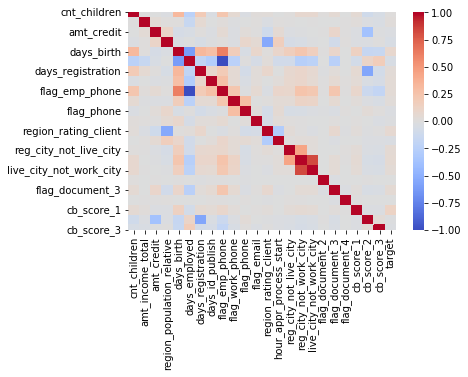

In [19]:
## 상관관계 살펴보기
sns.heatmap(data.corr(), cmap='coolwarm', vmin=-1, vmax=1) ## 타겟데이터와 관련성이 깊은 변수는 특별히 없음
data_delay = data[data['target'] == 1]

In [20]:
## 결측치 체크
data.isna().mean()

name_contract_type            0.000000
code_gender                   0.295583
flag_own_realty               0.398792
cnt_children                  0.000000
amt_income_total              0.000000
amt_credit                    0.304167
name_income_type              0.000000
name_education_type           0.000000
name_family_status            0.000000
name_housing_type             0.000000
region_population_relative    0.297875
days_birth                    0.197875
days_employed                 0.297875
days_registration             0.405542
days_id_publish               0.197542
flag_emp_phone                0.000000
flag_work_phone               0.000000
flag_phone                    0.000000
flag_email                    0.000000
region_rating_client          0.000000
weekday_appr_process_start    0.000000
hour_appr_process_start       0.000000
reg_city_not_live_city        0.000000
reg_city_not_work_city        0.000000
live_city_not_work_city       0.000000
organization_type        

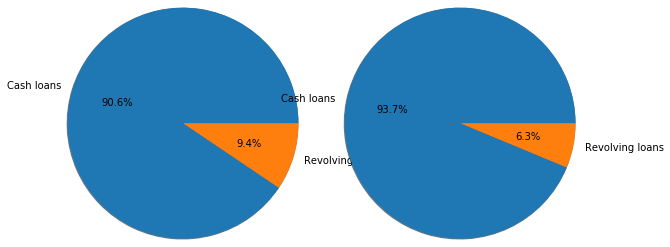

In [21]:
## name_contract_type 대출종류 (결측치없음) -> 일반대출의 연체비율이 조금더 높음
x = data['name_contract_type'].value_counts().index
y = data['name_contract_type'].value_counts()
plt.subplot(1,5,1)
plt.pie(y,labels=x, autopct='%.1f%%',shadow=True,radius=5)

x = data_delay['name_contract_type'].value_counts().index
y = data_delay['name_contract_type'].value_counts()
plt.subplot(1,5,5)
plt.pie(y,labels=x, autopct='%.1f%%',shadow=True, radius=5)
plt.show()

/opt/conda/envs/python3.6/lib/python3.6/site-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


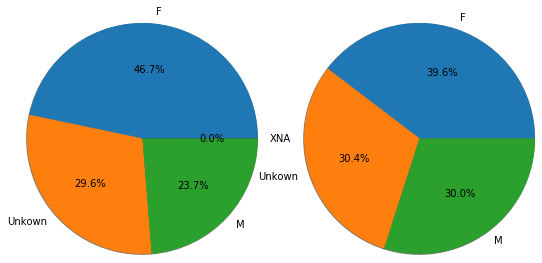

In [22]:
##결측치를 Unkown 으로 채워 체크
data['code_gender'].fillna('Unkown',inplace=True)
data_delay['code_gender'].fillna('Unkown',inplace=True)
## code_gender 성별(결측치있음) -> 남자일때, Unkown일때 연체비율 증가
x = data['code_gender'].value_counts().index
y = data['code_gender'].value_counts()
plt.subplot(1,5,1)
plt.pie(y,labels=x, autopct='%.1f%%',shadow=True,radius=5)

x = data_delay['code_gender'].value_counts().index
y = data_delay['code_gender'].value_counts()
plt.subplot(1,5,5)
plt.pie(y,labels=x, autopct='%.1f%%',shadow=True, radius=5)
plt.show()

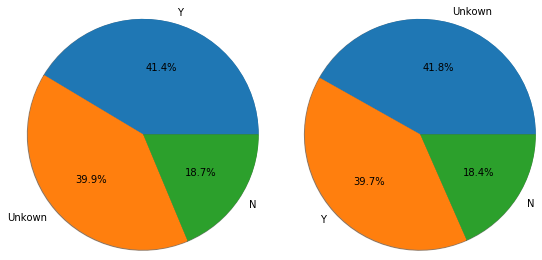

In [23]:
## flag_own_realty 자기부동산 보유여부(결측치있음) --> 비율이 거의 동일 -> 영향없으므로 drop 
data['flag_own_realty'].fillna('Unkown',inplace=True)
data_delay['flag_own_realty'].fillna('Unkown',inplace=True)
x = data['flag_own_realty'].value_counts().index
y = data['flag_own_realty'].value_counts()
plt.subplot(1,5,1)
plt.pie(y,labels=x, autopct='%.1f%%',shadow=True,radius=5)

x = data_delay['flag_own_realty'].value_counts().index
y = data_delay['flag_own_realty'].value_counts()
plt.subplot(1,5,5)
plt.pie(y,labels=x, autopct='%.1f%%',shadow=True, radius=5)
plt.show()

In [24]:
data.drop(columns=['flag_own_realty'],inplace=True)

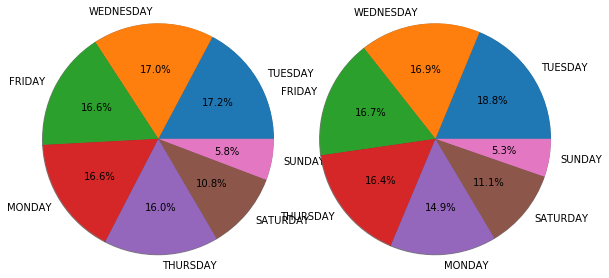

In [25]:
## weekday_appr_process_start 대출신청일자 --> 휴일과 평일의 비율이 거의 동일 -> 영향없으므로 drop 
data['weekday_appr_process_start'].fillna('Unkown',inplace=True)
data_delay['weekday_appr_process_start'].fillna('Unkown',inplace=True)
x = data['weekday_appr_process_start'].value_counts().index
y = data['weekday_appr_process_start'].value_counts()
plt.subplot(1,5,1)
plt.pie(y,labels=x, autopct='%.1f%%',shadow=True,radius=5)

x = data_delay['weekday_appr_process_start'].value_counts().index
y = data_delay['weekday_appr_process_start'].value_counts()
plt.subplot(1,5,5)
plt.pie(y,labels=x, autopct='%.1f%%',shadow=True, radius=5)
plt.show()

In [26]:
data.drop(columns=['weekday_appr_process_start'],inplace=True)

/opt/conda/envs/python3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/envs/python3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/conda/envs/python3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/opt/conda/envs/python3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional inde

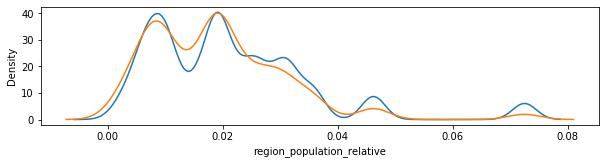

In [27]:
#인구밀도는 부도와 부도가 아닌데이터의 차이가 크게없고 결측이 많으므로 드롭
plt.figure(figsize = (10,10))
for i, feature in enumerate(['region_population_relative']):
   plt.subplot(4,1, i+1)
   sns.kdeplot(data.loc[data['target']==0, feature], label ='target =0')
   sns.kdeplot(data.loc[data['target']==1, feature], label ='target =1')

In [28]:
data.drop(columns=['region_population_relative'],inplace=True)

/opt/conda/envs/python3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/envs/python3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/conda/envs/python3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/opt/conda/envs/python3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional inde

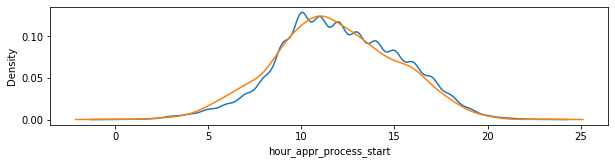

In [29]:
#신청시간 부도와 부도가 아닌데이터의 차이가 크게없고 통상관련이 적을것으로 보여 드롭
plt.figure(figsize = (10,10))
for i, feature in enumerate(['hour_appr_process_start']):
   plt.subplot(4,1, i+1)
   sns.kdeplot(data.loc[data['target']==0, feature], label ='target =0')
   sns.kdeplot(data.loc[data['target']==1, feature], label ='target =1')

In [30]:
data.drop(columns=['hour_appr_process_start'],inplace=True)

In [31]:
## amt_credit 대출금액(결측치있음) 
data['amt_credit'].describe()

count    1.670000e+04
mean     5.954254e+05
std      3.988125e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.108535e+05
75%      8.086500e+05
max      4.050000e+06
Name: amt_credit, dtype: float64

In [32]:
data_delay['amt_credit'].describe()

count    1.391000e+03
mean     5.682076e+05
std      3.559944e+05
min      4.797000e+04
25%      2.844000e+05
50%      5.084955e+05
75%      7.547400e+05
max      2.961000e+06
Name: amt_credit, dtype: float64

In [33]:
#-> 대략적이지만, 높은금액은 연체하지 않으므로, 결측치를 연체하지 않으면 높은금액, 연체는 연체평균치를 넣는다.
max_value = data['amt_credit'].max()
delay_mean = round(data_delay['amt_credit'].mean(),3)

new_amt_credit = []
for idx, row in data[['amt_credit','target']].iterrows():
    if(np.isnan(row['amt_credit'])):
        if(row['target'] == 1):
            new_amt_credit.append(delay_mean)
        else:
            new_amt_credit.append(max_value)
    else:
        new_amt_credit.append(row['amt_credit'])
new_amt_credit = pd.Series(new_amt_credit)
data['amt_credit'] = new_amt_credit

In [34]:
## days_birth 일단위나이(결측치있음) -> 값이 대출신청 시점에서 마이너스로 들어가 있음 -> 연단위 환산을 위해 대출신청 시점의 나이로 보기위애서 절대값으로변경후 /365 한다! 
## 추가로 10대20대30대40대.. 로 분류 하기위해 아래와 같이 처리
data['days_birth'] = round(abs(data['days_birth'])/365//10*10)

In [35]:
data_delay['days_birth'] = round(abs(data_delay['days_birth'])/365//10*10)

/opt/conda/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/opt/conda/envs/python3.6/lib/python3.6/site-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


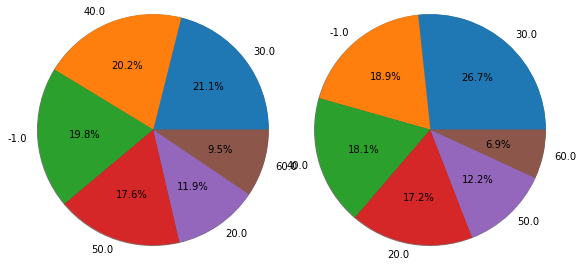

In [36]:
##결측치는 -1 로 채워서 한번 비교
data['days_birth'].fillna(-1,inplace=True)
data_delay['days_birth'].fillna(-1,inplace=True)
##30대의 비율이 높음!
x = data['days_birth'].value_counts().index
y = data['days_birth'].value_counts()
plt.subplot(1,5,1) 
plt.pie(y,labels=x, autopct='%.1f%%',shadow=True,radius=5)

x = data_delay['days_birth'].value_counts().index
y = data_delay['days_birth'].value_counts()
plt.subplot(1,5,5) 
plt.pie(y,labels=x, autopct='%.1f%%',shadow=True, radius=5)
plt.show()

In [37]:
## 특정나이때가 높으므로 숫자가 아닌 문자처리를 위해 문자로 치환
data['days_birth'] = str(data['days_birth'])

In [38]:
## days_employed 대출 신청 시점에서의 고객의 근무일수(결측치있음) --> 결측치가 40%이상이고, 특이사항이 보이지 않아 drop
data['days_employed'].describe()

count     16851.000000
mean      63041.865112
std      140634.051334
min      -16852.000000
25%       -2772.000000
50%       -1206.000000
75%        -299.000000
max      365243.000000
Name: days_employed, dtype: float64

In [39]:
data_delay['days_employed'].describe()

count      1381.000000
mean      44171.575670
std      121560.746389
min      -12127.000000
25%       -2164.000000
50%        -982.000000
75%        -353.000000
max      365243.000000
Name: days_employed, dtype: float64

/opt/conda/envs/python3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/envs/python3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/conda/envs/python3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/opt/conda/envs/python3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional inde

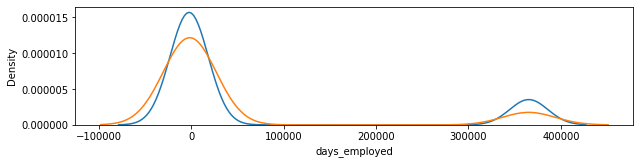

In [40]:
#근무일수 부도와 부도가 아닌데이터의 차이가 크게없고 결측이 많으므로 드롭
plt.figure(figsize = (10,10))
for i, feature in enumerate(['days_employed']):
   plt.subplot(4,1, i+1)
   sns.kdeplot(data.loc[data['target']==0, feature], label ='target =0')
   sns.kdeplot(data.loc[data['target']==1, feature], label ='target =1')

In [41]:
data.drop(columns=['days_employed'],inplace=True)

In [42]:
data['days_registration'].describe()

count    14267.000000
mean     -5016.930118
std       3541.618561
min     -24672.000000
25%      -7537.000000
50%      -4521.000000
75%      -2050.500000
max          0.000000
Name: days_registration, dtype: float64

In [43]:
data_delay['days_registration'].describe()

count     1219.000000
mean     -4652.724364
std       3382.310162
min     -18437.000000
25%      -7011.000000
50%      -4238.000000
75%      -1748.500000
max         -1.000000
Name: days_registration, dtype: float64

In [44]:
## days_registration 대출 신청 이전에 고객이 등록정보를 변경한 시점 사이의 일수(결측치있음)
# 연체한 고객이 상대적으로, 최근에 고객정보를 변경함
# 결측치는 각 구분별 평균치로 채운다
mean_all = data['days_registration'].mean()
mean_delay = data_delay['days_registration'].mean()

new_days_registration = []

for idx, row in data[['days_registration','target']].iterrows():
    if(np.isnan(row['days_registration'])):
        if(row['target'] == 1):
            new_days_registration.append(mean_delay)
        else:
            new_days_registration.append(mean_all)
    else:
        new_days_registration.append(row['days_registration'])
new_days_registration = pd.Series(new_days_registration)
data['days_registration'] = new_days_registration

In [45]:
data['days_id_publish'].describe()

count    19259.000000
mean     -2990.491926
std       1513.089981
min      -6263.000000
25%      -4308.000000
50%      -3251.000000
75%      -1717.500000
max          0.000000
Name: days_id_publish, dtype: float64

In [46]:
data_delay['days_id_publish'].describe()

count    1588.000000
mean    -2763.680730
std      1521.776567
min     -6082.000000
25%     -4148.000000
50%     -2891.000000
75%     -1430.500000
max        -3.000000
Name: days_id_publish, dtype: float64

In [47]:
## days_id_publish 대출 신청 이전에 고객이 신분증을 변경한 시점 사이의 일수(결측치있음)
## 고객정보 변경과 동일, 연체일수록 좀더 최근에 변경함
mean_all = data['days_id_publish'].mean()
mean_delay = data_delay['days_id_publish'].mean()

new_days_id_publish = []

for idx, row in data[['days_id_publish','target']].iterrows():
    if(np.isnan(row['days_id_publish'])):
        if(row['target'] == 1):
            new_days_id_publish.append(mean_delay)
        else:
            new_days_id_publish.append(mean_all)
    else:
        new_days_id_publish.append(row['days_id_publish'])
new_days_id_publish = pd.Series(new_days_id_publish)
data['days_id_publish'] = new_days_id_publish

In [48]:
## cb_score_1 cb_score_2 cb_score_3 신용점수1,2,3(결측치있음)
## 3개의 값중에서, 큰값으로 교차되게 해서 결측지를 줄인다. -> cb_score 로 새로운 수치 생성
data['cb_score_1'].fillna(0,inplace=True)
data['cb_score_2'].fillna(0,inplace=True)
data['cb_score_3'].fillna(0,inplace=True)

new_cb_score= []

for _, row in data[['cb_score_1','cb_score_2','cb_score_3']].iterrows():
    new_cb_score.append(max(row['cb_score_1'],row['cb_score_2'],row['cb_score_3']))

new_cb_score = pd.Series(new_cb_score)
data['cb_score'] = new_cb_score

In [49]:
data[data['cb_score'] == 0 ]['cb_score'] = np.nan

/opt/conda/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
 data[data['target']==0]['cb_score'].describe()

count    22007.000000
mean        60.760197
std         14.316803
min          0.000000
25%         55.998117
50%         62.569531
75%         68.749885
max        100.000000
Name: cb_score, dtype: float64

In [51]:
## 값들의 분포가, 연체가 있을수록 큰 경향이 있다. ( 현재 우리나라의 등급같이 높은숫자가 낮은등급으로 보임 ) 
data[data['target']==1]['cb_score'].describe()

count    1993.000000
mean       61.920160
std        14.292668
min         0.000000
25%        56.867611
50%        63.527433
75%        69.993282
max        99.870790
Name: cb_score, dtype: float64

In [52]:
## 결측이 있는 cb_score 모두 drop
data.drop(columns=['cb_score_1','cb_score_2','cb_score_3'],inplace=True)

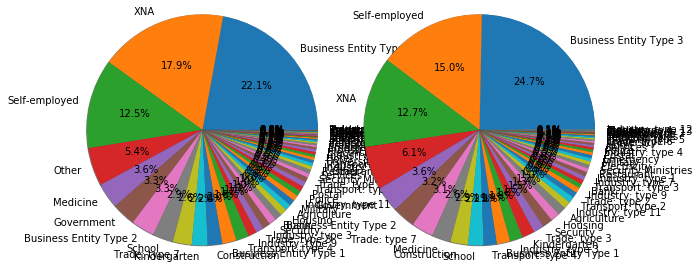

In [53]:
##organization_type 근무 회사 유형 분석 -> 통상 직업은 영향도가 있다고 생각되어서 일단 넣어서 학습 시작 
x = data['organization_type'].value_counts().index
y = data['organization_type'].value_counts()
plt.subplot(1,5,1)
plt.pie(y,labels=x, autopct='%.1f%%',shadow=True,radius=5)

x = data_delay['organization_type'].value_counts().index
y = data_delay['organization_type'].value_counts()
plt.subplot(1,5,5)
plt.pie(y,labels=x, autopct='%.1f%%',shadow=True, radius=5)
plt.show()

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name_contract_type       24000 non-null  object 
 1   code_gender              24000 non-null  object 
 2   cnt_children             24000 non-null  int64  
 3   amt_income_total         24000 non-null  float64
 4   amt_credit               24000 non-null  float64
 5   name_income_type         24000 non-null  object 
 6   name_education_type      24000 non-null  object 
 7   name_family_status       24000 non-null  object 
 8   name_housing_type        24000 non-null  object 
 9   days_birth               24000 non-null  object 
 10  days_registration        24000 non-null  float64
 11  days_id_publish          24000 non-null  float64
 12  flag_emp_phone           24000 non-null  int64  
 13  flag_work_phone          24000 non-null  int64  
 14  flag_phone            

In [55]:
## object 는 더미로 변환 
ready_data = pd.get_dummies(data, columns=['name_contract_type','code_gender','name_income_type','name_education_type','name_family_status','name_housing_type','days_birth','organization_type'], drop_first= True)

In [56]:
## 테스트셋 구분
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ready_data.drop('target', axis=1), ready_data['target'], test_size=0.3, random_state=100)

In [57]:
## XGBoost 모델을 이용하여 훈련
import xgboost as xgb
model = xgb.XGBClassifier(n_estimators=500, max_depth=5, random_state=100)
model.fit(X_train, y_train)
pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test,pred)

/opt/conda/envs/python3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:43:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.96625

In [58]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      6597
           1       0.94      0.64      0.76       603

    accuracy                           0.97      7200
   macro avg       0.95      0.82      0.87      7200
weighted avg       0.97      0.97      0.96      7200



In [59]:
print(confusion_matrix(y_test,pred))

[[6573   24]
 [ 219  384]]


In [61]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,pred)

0.8165889515587139

# 데이터 변환
> 다음 내용이 유일

In [55]:
## object 는 더미로 변환 
ready_data = pd.get_dummies(data, columns=['name_contract_type','code_gender','name_income_type','name_education_type','name_family_status','name_housing_type','days_birth','organization_type'], drop_first= True)